### 학습목표
- 목적에 맞추어 데이터를 준비하고 다듬는 방법을 알아보자

In [4]:
import pandas as pd
import os

In [6]:
# 작업디렉토리 변경
os.chdir('./data')
print(os.getcwd())

C:\Users\lgdxschool2\python_study\lecture\파이썬 라이브러리\data


## 1.데이터 병합

### concat
- 데이터를 행 방향이나 열 방향으로 단순히 붙이는 함수

#### 4,5,6월 pay-info 데이터를 각각 불러와 한개의 df로 병합하고 total_pay_info로 저장

In [12]:
# 읽어들일 파일명 추출
file_names = os.listdir('./월별급여/')
file_names

['hr-pay-info-4월.csv', 'hr-pay-info-5월.csv', 'hr-pay-info-6월.csv']

In [18]:
pay_df_list = [] # 빈 리스트 생성
for fn in file_names:
    df = pd.read_csv(os.path.join('./월별급여',fn), encoding='euc-kr')
    # display(df)
    pay_df_list.append(df)

In [24]:
total_df = pd.concat(pay_df_list)
total_df

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240401,월급,850
1,E00181,20240401,월급,791
2,E00164,20240401,월급,758
3,E00190,20240401,월급,708
4,E00209,20240401,월급,716
...,...,...,...,...
146,E00322,20240601,월급,375
147,E00389,20240601,월급,375
148,E00438,20240601,월급,375
149,E00304,20240601,월급,375


In [30]:
# csv파일로 저장
total_df.to_csv('./total_pay_info.csv', index=False) # df의 인덱스 정보는 저장 x

### org_info 데이터에 각 조직별 조직 인원수, 평균나이, 평균근무년수, 평균연봉을 추가하자

In [8]:
hr_info = pd.read_csv('./hr-info.csv', encoding='euc-kr')
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [78]:
num = hr_info['ORG_CD'].value_counts().sort_index()
num

ORG_CD
ORG001     6
ORG002     4
ORG003     5
ORG004    11
ORG005     8
ORG006     6
ORG007     7
ORG008     5
ORG009     5
ORG010     3
ORG011     5
ORG012     5
ORG013     8
ORG014     8
ORG015     3
ORG016     8
ORG017    10
ORG018     6
ORG019    10
ORG020     3
ORG021    12
ORG022     4
ORG023    12
ORG024     5
ORG025     8
ORG026     5
ORG027     7
ORG028     4
ORG029     4
ORG030    10
Name: count, dtype: int64

In [74]:
dd = hr_info[['ORG_CD','AGE','SERVICE_YEAR','SALARY']].groupby(by='ORG_CD').mean()
dd

,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,
ORG001,26.166667,0.333333,5033.333333
ORG002,34.000000,7.500000,6550.000000
ORG003,34.600000,7.600000,6480.000000
ORG004,35.181818,7.000000,6445.454545
ORG005,29.250000,2.000000,5525.000000
ORG006,30.833333,4.166667,5966.666667
ORG007,36.714286,8.000000,6728.571429
ORG008,32.400000,5.200000,6020.000000
ORG009,29.800000,2.200000,5520.000000


In [82]:
result = pd.concat([num, dd], axis=1)
result

,count,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,
ORG001,6,26.166667,0.333333,5033.333333
ORG002,4,34.000000,7.500000,6550.000000
ORG003,5,34.600000,7.600000,6480.000000
ORG004,11,35.181818,7.000000,6445.454545
ORG005,8,29.250000,2.000000,5525.000000
ORG006,6,30.833333,4.166667,5966.666667
ORG007,7,36.714286,8.000000,6728.571429
ORG008,5,32.400000,5.200000,6020.000000
ORG009,5,29.800000,2.200000,5520.000000


In [98]:
# total_need_info =hr_info[["ORG_CD","AGE","SALARY","SERVICE_YEAR"]].groupby(by="ORG_CD").agg({"ORG_CD" : 'count',"AGE" : 'mean',"SALARY" : 'mean',
#                                                              "SERVICE_YEAR" : 'mean'})
# total_need_info

,ORG_CD,AGE,SALARY,SERVICE_YEAR
ORG_CD,,,,
ORG001,6,26.166667,5033.333333,0.333333
ORG002,4,34.000000,6550.000000,7.500000
ORG003,5,34.600000,6480.000000,7.600000
ORG004,11,35.181818,6445.454545,7.000000
ORG005,8,29.250000,5525.000000,2.000000
ORG006,6,30.833333,5966.666667,4.166667
ORG007,7,36.714286,6728.571429,8.000000
ORG008,5,32.400000,6020.000000,5.200000
ORG009,5,29.800000,5520.000000,2.200000


In [88]:
org_info = pd.read_csv('./org-info.csv', encoding='euc-kr', index_col=0)
org_info.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."


In [96]:
org_info_new = pd.concat([org_info, result], axis=1)

org_info_new.to_csv('./org_info_new.csv', encoding='euc-kr') # df의 인덱스 정보는 저장 x

----

In [101]:
# 구성원 정보를 집계
hr = pd.read_csv('./hr-info.csv', encoding='euc-kr')
hr.head(3)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


In [107]:
org_agg = hr[['EID','AGE','SERVICE_YEAR','SALARY','ORG_CD']].groupby(by='ORG_CD').agg({'EID':'count','AGE':'mean','SERVICE_YEAR':'mean','SALARY':'mean',})
org_agg

,EID,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,
ORG001,6,26.166667,0.333333,5033.333333
ORG002,4,34.000000,7.500000,6550.000000
ORG003,5,34.600000,7.600000,6480.000000
ORG004,11,35.181818,7.000000,6445.454545
ORG005,8,29.250000,2.000000,5525.000000
ORG006,6,30.833333,4.166667,5966.666667
ORG007,7,36.714286,8.000000,6728.571429
ORG008,5,32.400000,5.200000,6020.000000
ORG009,5,29.800000,2.200000,5520.000000


In [113]:
# 조직정보 로딩
org = pd.read_csv('./org-info.csv', encoding='euc=kr', index_col='ORG_CD')
org.head(3)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
ORG_CD,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."
ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.


In [119]:
org_new = pd.concat([org, org_agg], axis=1) # axis : 연산의 기준점이 되는 축
org_new.head(2)

,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,EID,AGE,SERVICE_YEAR,SALARY
ORG_CD,,,,,,,,,,,
ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,6,26.166667,0.333333,5033.333333
ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",4,34.000000,7.500000,6550.000000


In [121]:
org_new.shape

(30, 11)

-----

### merge
- 공통된 컬럼을 기준으로 양쪽의 데이터를 병합할 때 사용
- 데이터베이스의 조인 개념과 유사

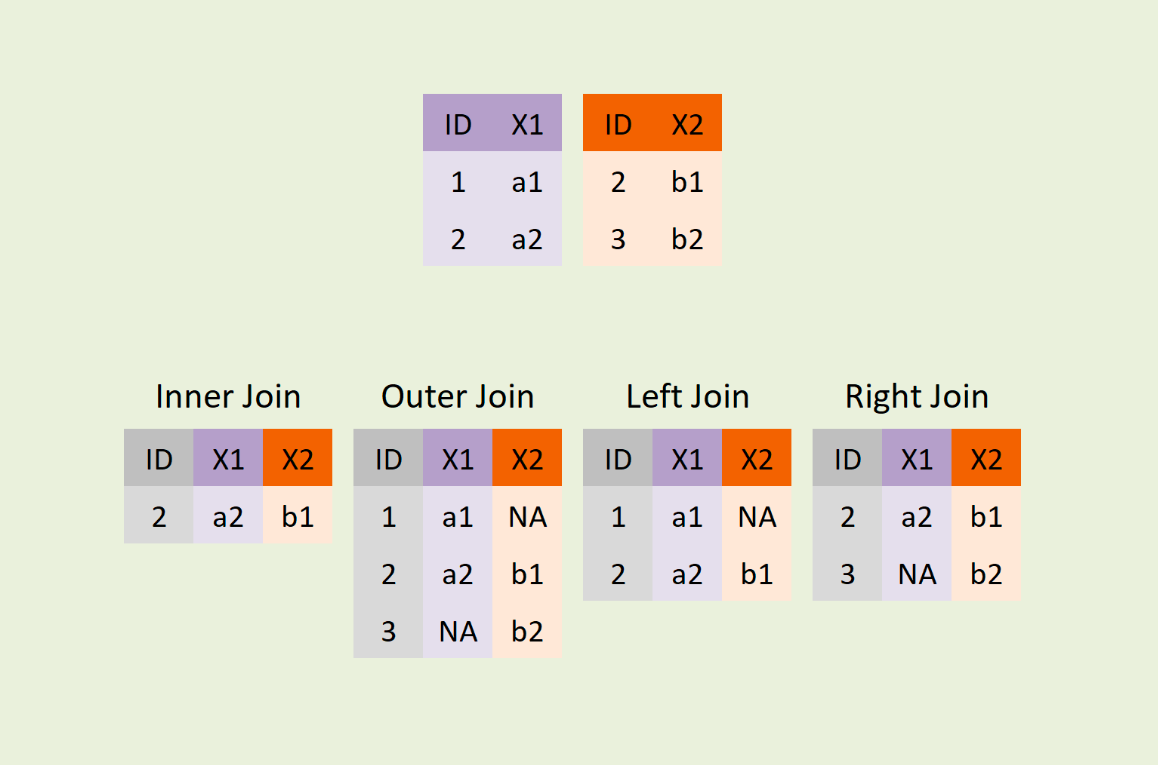

In [138]:
# hr_info, org_info -> merge
hr_info = pd.read_csv('./hr-info.csv', encoding='euc-kr')
org_info = pd.read_csv('./org-info.csv', encoding='euc-kr')
print(hr_info.shape, org_info.shape)  # 200명 직원 데이터, 30개 조직 데이터

(200, 20) (30, 8)


In [144]:
# 구성원정보에 팀명을 추가하여 만들자
result1 = pd.merge(hr_info, org_info, how='left', on='ORG_CD')
result1[['ENAME','ORG_CD','KOR_TEAM']]

,ENAME,ORG_CD,KOR_TEAM
0,시이오,NaN,NaN
1,나사장,NaN,NaN
2,난부사장,NaN,NaN
3,판라다,ORG007,글로벌 판매 전략 팀
4,누훈봉,ORG023,첨단 제조 팀
...,...,...,...
195,부탐회,ORG014,주방 제품 마케팅 팀
196,초두반,ORG012,기술 영업 지원 팀
197,권개득,ORG024,생산 품질 관리 팀
198,탐출조,ORG009,고객 통찰 팀


In [148]:
# 각 조직에 속하는 구성원들을 병합
result2 = pd.merge(hr_info, org_info, how='right', on='ORG_CD')
result2.tail(3)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,REHIRE_YN,NATION,ROUNDING_DEDUCTION,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
194,E00317,규산용,M,ORG030,P008,27,0,학사 학위,0.0,5000,...,NaN,Japan,N,Home Entertainment Division,HE사업본부,Washing Machine Operations Department,세탁기운영센터,Information Management Team,정보관리팀,"세탁기 관련 정보의 수집, 저장, 관리 및 배포를 담당합니다."
195,E00413,당루판,F,ORG030,P008,27,0,학사 학위,0.0,5000,...,NaN,Japan,N,Home Entertainment Division,HE사업본부,Washing Machine Operations Department,세탁기운영센터,Information Management Team,정보관리팀,"세탁기 관련 정보의 수집, 저장, 관리 및 배포를 담당합니다."
196,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.0,4500,...,NaN,KOREA,N,Home Entertainment Division,HE사업본부,Washing Machine Operations Department,세탁기운영센터,Information Management Team,정보관리팀,"세탁기 관련 정보의 수집, 저장, 관리 및 배포를 담당합니다."


### hr-pay-info(급여지급내역) -> ID, 날짜, 금액종류, 금액, 이름, 성별
- 이름, 성별 -> hr-info

In [161]:
pay_info = pd.read_csv('./hr-pay-info.csv', encoding='euc-kr')
pay_info.head()

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716


In [169]:
hr_info.head(3)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


In [179]:
hr_ii = hr_info[['EID','ENAME','GENDER']]
hr_ii

,EID,ENAME,GENDER
0,E00206,시이오,M
1,E00181,나사장,F
2,E00164,난부사장,M
3,E00190,판라다,F
4,E00209,누훈봉,M
...,...,...,...
195,E00322,부탐회,F
196,E00389,초두반,F
197,E00438,권개득,M
198,E00304,탐출조,M


In [181]:
pay_info_new = pd.merge(pay_info, hr_ii, how='left', on='EID')
pay_info_new

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT,ENAME,GENDER
0,E00206,20240601,월급,850,시이오,M
1,E00181,20240601,월급,791,나사장,F
2,E00164,20240601,월급,758,난부사장,M
3,E00190,20240601,월급,708,판라다,F
4,E00209,20240601,월급,716,누훈봉,M
...,...,...,...,...,...,...
750,E00322,20240401,상여금,300,부탐회,F
751,E00389,20240401,상여금,300,초두반,F
752,E00438,20240401,상여금,300,권개득,M
753,E00304,20240401,상여금,300,탐출조,M


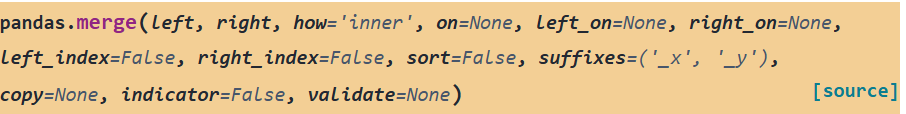

- 두 데이터프레임의 컬럼이름이 다를때, left_on과 right_on을 사용한다

----

#### 연습문제
- 지구대별 신고건수 및 CCTV 설치 숫자를 정리하고 두 변수 사이에 관계가 있는지 확인해보자
- 같은 동

In [277]:
report = pd.read_csv('./경찰청 광주광역시경찰청_경찰서별 파출소 및 지구대 신고접수 건수_20240130.csv', encoding='euc-kr')
report.head(3)

,구분,경찰서,파출소 및 지구대,신고출동 조회기간,신고출동 건수
0,광주광역시경찰청,광주광산서,수완지구대,2023-01-01~2024-01-30,24686
1,광주광역시경찰청,광주광산서,우산지구대,2023-01-01~2024-01-30,11627
2,광주광역시경찰청,광주광산서,월곡지구대,2023-01-01~2024-01-30,9988


In [263]:
cctv = pd.read_csv('./광주광역시_CCTV_20240630.CSV', encoding='euc-kr')
cctv.head(3)

,관리기관명,소재지지번주소,소재지도로명주소,카메라대수,카메라화소,촬영방면,보관일수,설치연도,위도,경도,데이터기준일자
0,광주광역시 사회재난과,광산구 광산동 666-7,광산구 고봉로 905,2,200만,360도,30일,2018,35.225272,126.735854,2024-06-30
1,광주광역시 사회재난과,광산구 도덕동 320-15,광산구 삼도로 342,1,200만,360도,30일,2022,35.162851,126.699911,2024-06-30
2,광주광역시 사회재난과,광산구 도덕동 320-15,광산구 삼도로 342,1,200만,360도,30일,2024,35.162851,126.699911,2024-06-30


In [279]:
report_df = report[['파출소 및 지구대','신고출동 건수']]
cctv_df = cctv[['소재지지번주소','카메라대수']]

In [281]:
report_df['파출소 및 지구대'] = report_df['파출소 및 지구대'].str[:2]
report_df

C:\Users\lgdxschool2\AppData\Local\Temp\ipykernel_9048\3298153368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_df['파출소 및 지구대'] = report_df['파출소 및 지구대'].str[:2]


,파출소 및 지구대,신고출동 건수
0,수완,24686
1,우산,11627
2,월곡,9988
3,첨단,17004
4,동곡,564
5,하남,6661
6,삼도,581
7,본량,202
8,도산,8656
9,송정,3499


In [283]:
cctv_df

,소재지지번주소,카메라대수
0,광산구 광산동 666-7,2
1,광산구 도덕동 320-15,1
2,광산구 도덕동 320-15,1
3,광산구 도산동 1128-4,4
4,광산구 도산동 1282-1,2
...,...,...
6515,남구 주월동 1013-1,2
6516,남구 백운동 659-1,3
6517,남구 백운동 659-1,3
6518,남구 백운동 634-26,2


In [241]:
cctv_df['소재지지번주소'].str.split(' ')[0][1]

'광산동'

In [245]:
cctv_df['소재지지번주소'][0]

'광산구 광산동 666-7'

In [285]:
for i in range(len(cctv_df)):
    cctv_df['소재지지번주소'][i] = cctv_df['소재지지번주소'].str.split(' ')[i][1]

C:\Users\lgdxschool2\AppData\Local\Temp\ipykernel_9048\3083369903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cctv_df['소재지지번주소'][i] = cctv_df['소재지지번주소'].str.split(' ')[i][1]
C:\Users\lgdxschool2\AppData\Local\Temp\ipykernel_9048\3083369903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cctv_df['소재지지번주소'][i] = cctv_df['소재지지번주소'].str.split(' ')[i][1]
C:\Users\lgdxschool2\AppData\Local\Temp\ipykernel_9048\3083369903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

- for문 없이 풀이 방법

In [ ]:
# pol2["소재지지번주소"] = pol2["소재지지번주소"].str.split("동").str[0].str[-2:]

In [251]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520 entries, 0 to 6519
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소재지지번주소  6520 non-null   object
 1   카메라대수    6520 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 102.0+ KB


In [270]:
cctv_df['소재지지번주소']

0       광산동
1       도덕동
2       도덕동
3       도산동
4       도산동
       ... 
6515    주월동
6516    백운동
6517    백운동
6518    백운동
6519    봉선동
Name: 소재지지번주소, Length: 6520, dtype: object

In [286]:
cctv_df['소재지지번주소'] = cctv_df['소재지지번주소'].str[:2]
cctv_df

C:\Users\lgdxschool2\AppData\Local\Temp\ipykernel_9048\3838408544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cctv_df['소재지지번주소'] = cctv_df['소재지지번주소'].str[:2]


,소재지지번주소,카메라대수
0,광산,2
1,도덕,1
2,도덕,1
3,도산,4
4,도산,2
...,...,...
6515,주월,2
6516,백운,3
6517,백운,3
6518,백운,2


In [287]:
report_df

,파출소 및 지구대,신고출동 건수
0,수완,24686
1,우산,11627
2,월곡,9988
3,첨단,17004
4,동곡,564
5,하남,6661
6,삼도,581
7,본량,202
8,도산,8656
9,송정,3499


In [338]:
cctv_df2 = cctv_df[['소재지지번주소','카메라대수']].groupby(by='소재지지번주소').agg({'카메라대수':'sum'})
cctv_df2

,카메라대수
소재지지번주소,
각화,59
계림,203
고룡,3
광산,20
광천,82
...,...
화장,2
화정,389
황금,11


In [321]:
reprot_cctv = pd.merge(report_df, cctv_df2, how='left', left_on='파출소 및 지구대', right_on='소재지지번주소')
reprot_cctv

,파출소 및 지구대,신고출동 건수,카메라대수
0,수완,24686,181.0
1,우산,11627,314.0
2,월곡,9988,225.0
3,첨단,17004,NaN
4,동곡,564,NaN
5,하남,6661,106.0
6,삼도,581,3.0
7,본량,202,NaN
8,도산,8656,133.0
9,송정,3499,171.0


- cctv 첨단, 동곡, 본량, 평동, 지원, 학서, 상무, 염주, 효덕, 동운, 역전, 건국, 석곡 NaN값 나옴 --> '소재지도로명주소'에서 가져와야 될듯 싶다
- 학서, 염주, 역전, 건국 지역 없음

- 신고출동 건수가 높으면 CCTV 개수가 낮은 편이다

In [323]:
reprot_cctv[['신고출동 건수','카메라대수']].corr()

,신고출동 건수,카메라대수
신고출동 건수,1.000000,0.470998
카메라대수,0.470998,1.000000


In [325]:
reprot_cctv_drop = reprot_cctv.dropna(axis=0)
reprot_cctv_drop

,파출소 및 지구대,신고출동 건수,카메라대수
0,수완,24686,181.0
1,우산,11627,314.0
2,월곡,9988,225.0
5,하남,6661,106.0
6,삼도,581,3.0
8,도산,8656,133.0
9,송정,3499,171.0
10,임곡,333,19.0
11,비아,2615,102.0
13,금남,15481,46.0


In [327]:
reprot_cctv_drop[['신고출동 건수','카메라대수']].corr()

,신고출동 건수,카메라대수
신고출동 건수,1.000000,0.470998
카메라대수,0.470998,1.000000


## 2. 정렬

### sort
- 인덱스를 기준으로 정렬하기 : df.sort_index()
- 값을 기준으로 정렬하기 : df.sort_values()

In [10]:
# 인덱스 지정 후 정렬
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [22]:
hr_info.set_index('EID').sort_index().head()

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00163,득치패,M,ORG013,P008,28,0,학사 학위,0.00,5000,2024-03-01,4,"Project Management, Salesforce, Java",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00165,내감반,M,ORG006,P008,24,0,학사 학위,0.00,5000,2024-03-01,4,"Python, Data Analysis",Y,2024-03-01,NaN,NaN,NaN,KOREA,Y
E00167,명묵말,M,ORG013,P005,42,12,석사 학위,3.88,7300,2024-03-01,46,Salesforce,Y,2012-03-01,NaN,NaN,NaN,KOREA,Y
E00168,인환숙,M,ORG025,P007,30,1,학사 학위,4.18,5600,2024-03-01,60,Data Analysis,N,2023-03-01,2024-03-01,이직,N,KOREA,Y


In [26]:
# axis 속서응로 정렬되는 축 설정
hr_info.set_index('EID').sort_index(axis=1).head()  # 컬럼 인덱스 기준으로 정렬

,ACTIVE_STATE,AGE,EDU_LEVEL,ENAME,GENDER,HIRE_DATE,LAST_PROMO_DT,NATION,ORG_CD,PERFORMANCE_SCORE,POS_CD,REHIRE_YN,RETIRE_DATE,RETIRE_REASON,ROUNDING_DEDUCTION,SALARY,SERVICE_YEAR,SKILLS,TRAINING_HOURS
EID,,,,,,,,,,,,,,,,,,,
E00206,Y,49,박사 학위,시이오,M,1999-03-01,2024-03-01,KOREA,NaN,4.50,P001,NaN,NaN,NaN,Y,10200,25,"Marketing, Salesforce",240
E00181,Y,49,박사 학위,나사장,F,2000-03-01,2024-03-01,KOREA,NaN,4.60,P002,NaN,NaN,NaN,Y,9500,24,"Project Management, Marketing",236
E00164,Y,48,박사 학위,난부사장,M,2002-03-01,2024-03-01,KOREA,NaN,4.60,P003,NaN,NaN,NaN,Y,9100,22,"Salesforce, Data Analysis, Java",240
E00190,Y,47,박사 학위,판라다,F,2006-03-01,2024-03-01,KOREA,ORG007,3.51,P004,NaN,NaN,NaN,Y,8500,18,"Java, Data Analysis, Salesforce",96
E00209,Y,47,박사 학위,누훈봉,M,2005-03-01,2023-03-01,KOREA,ORG023,3.38,P004,NaN,NaN,NaN,Y,8600,19,"Java, Salesforce",66


In [28]:
# 값을 기준으로 정렬기기
hr_info.sort_values(by='SALARY') # 연봉 기준으로 정렬 (오름차순 정렬)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
199,E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.00,4500,NaN,4,"Data Analysis, Python, Marketing",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [30]:
hr_info.sort_values(by='SALARY', ascending=False) # 연봉 기준으로 정렬 (내림차순 정렬)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N


In [32]:
# 2개 이상의 기준으로 정렬하기
# 나이, 연봉
# ascending 속성도 리스트를 이용해 각자 기준을 잡을 수 있다
hr_info.sort_values(by=['SALARY', 'AGE'])

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [34]:
# 정렬된 값을 원본데이터에 적용하기
hr_info.sort_values(by='AGE', inplace=True)
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,2024-03-01,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y
9,E00218,영할휘,M,ORG003,P004,48,20,학사 학위,3.22,8500,2022-03-01,86,"Data Analysis, Salesforce",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


### rank
- 각 데이터의 순위를 매겨서 리턴해주는 함수

In [42]:
salary_rank = hr_info['SALARY'].rank()
hr_info['RANK'] = salary_rank
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,RANK
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.0,4500,...,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,9.5
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.0,4500,...,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,9.5
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.0,4500,...,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,9.5
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.0,4500,...,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,9.5
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.0,4500,...,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,9.5


In [44]:
hr_info['SALARY'].rank()

188      9.5
184      9.5
185      9.5
186      9.5
187      9.5
       ...  
13     191.0
14     186.5
9      191.0
1      199.0
0      200.0
Name: SALARY, Length: 200, dtype: float64

## 3. 재구조화

### pivot
- df.pivot(index='컬럼명', columns='컬럼명', values='컬럼명')

In [48]:
hr_pay_info = pd.read_csv('./hr-pay-info.csv', encoding='euc-kr')
hr_pay_info.head()

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716


In [50]:
hr_pay_info_df = hr_pay_info[hr_pay_info['PAYMENT_DVCD']=='월급']  # 상여금 제외하기
hr_pay_info_df.pivot(index='EID', columns='PAYMENT_DY', values='PAYMENT_AMOUNT')

PAYMENT_DY,20240401,20240501,20240601
EID,,,
E00163,417,417,417
E00164,758,758,758
E00165,416,416,416
E00167,608,608,608
E00169,708,708,708
...,...,...,...
E00487,716,716,716
E00491,575,575,575
E00496,558,558,558
